# **Motorbike Ambulance Calls**
>Motorbike accidents and corresponded ambulance calls are highly depended on environmental and seasonal settings, like weather conditions, precipitation, day of week, season, hour of the day, etc. The data was aggregated over the course of two years, on hourly basis, and then extracted and extended with the corresponding weather and seasonal information.


## **Associated tasks**

---


**Regression**

Prediction of the hourly ambulance calls count based on the environmental and seasonal settings. Prediction model should provide monotonic in the terms of some features, if it is proved by data.
1
**Event and Anomaly Detection**

Define the  ambulance calls patterns with respect of special events and define the cases that might be considered as abnormal behavior.  

**Deliverables**

Full Texts Report that contains detail description of Data Analysis, Data Modelling and Patterns/Anomaly detection processes with conclusions and their explanations.
What is important here:
* See the **way you’re thinking** – what actions you’re implementing and why
* How **you code** and wrangle the data
* **Storytelling** capabilities – so we’re looking for the full-text structured report separately from the code/notebook
* **Suggestions** on the further  analytics/approaches which could be applied

## **Dataset characteristics:**

---



motorbike_ambulance_calls.csv has the following fields:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('motorbike_ambulance_calls.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

In [11]:
data = data.assign(
    day=data.index.day,
    month=data.index.month,
    year=data.index.year,
    hour=data['hr'] if 'hr' in data.columns else None
)

print("Columns in dataset:", data.columns)

categorical_cols = ['season', 'weathersit', 'weekday']
for col in categorical_cols:
    if col in data:
        data = pd.get_dummies(data, columns=[col], drop_first=True)
    else:
        print(f"Column '{col}' not found in dataset.")

data.drop(columns=[col for col in ['index', 'mnth', 'hr'] if col in data.columns], inplace=True)


Columns in dataset: Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'day',
       'month', 'year', 'hour', 'weathersit_2', 'weathersit_3', 'weathersit_4',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6'],
      dtype='object')
Column 'season' not found in dataset.
Column 'weathersit' not found in dataset.
Column 'weekday' not found in dataset.


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 to 2012-12-31
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             17379 non-null  int64  
 1   holiday        17379 non-null  int64  
 2   workingday     17379 non-null  int64  
 3   temp           17379 non-null  float64
 4   atemp          17379 non-null  float64
 5   hum            17379 non-null  float64
 6   windspeed      17379 non-null  float64
 7   cnt            17379 non-null  int64  
 8   season_spring  17379 non-null  bool   
 9   season_summer  17379 non-null  bool   
 10  season_winter  17379 non-null  bool   
 11  day            17379 non-null  int32  
 12  month          17379 non-null  int32  
 13  year           17379 non-null  int32  
 14  hour           0 non-null      object 
 15  weathersit_2   17379 non-null  bool   
 16  weathersit_3   17379 non-null  bool   
 17  weathersit_4   17379 non-null  bo

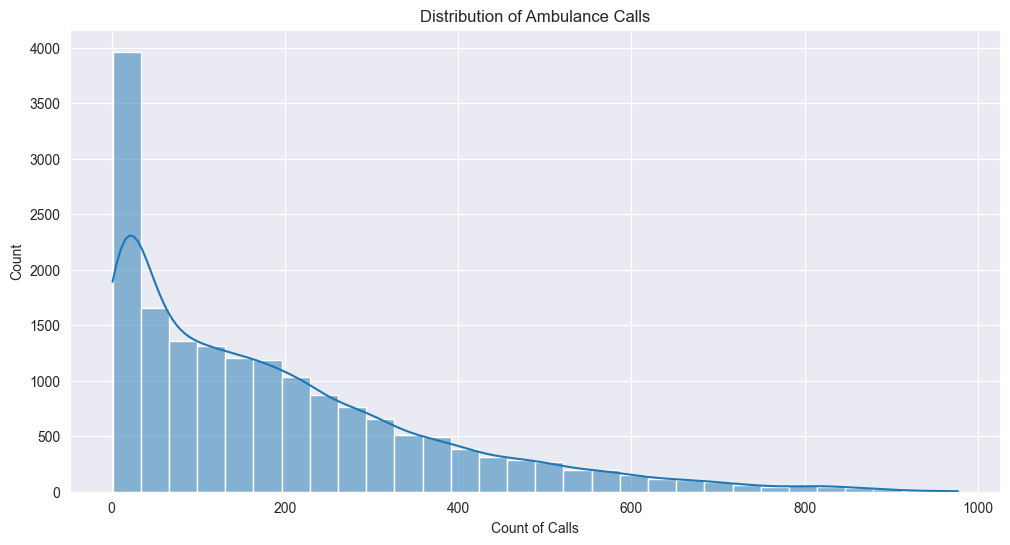

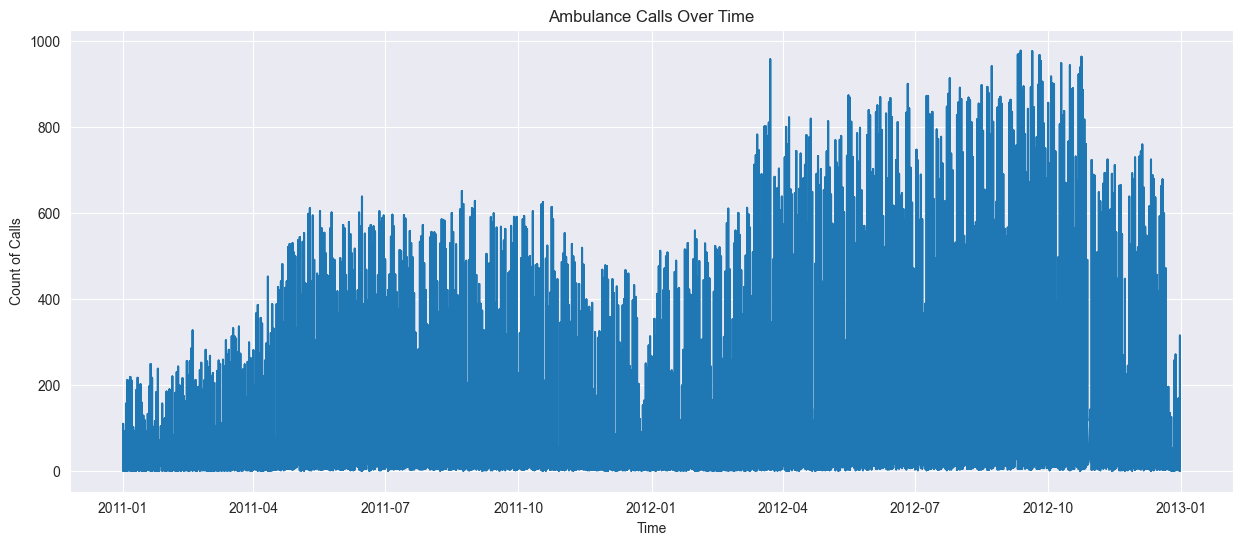

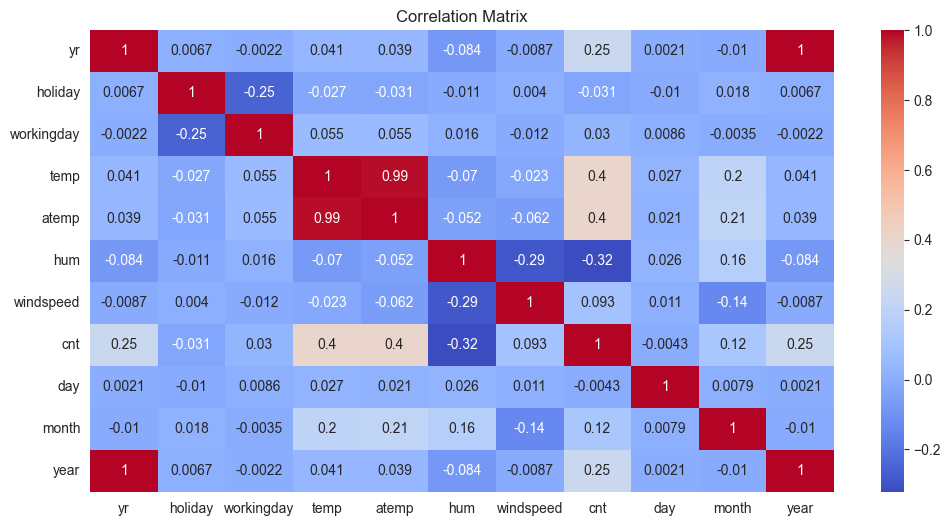

In [12]:
print(data.info())
print(data.describe())

data = pd.get_dummies(data, drop_first=True)

plt.figure(figsize=(12, 6))
sns.histplot(data['cnt'], bins=30, kde=True)
plt.title('Distribution of Ambulance Calls')
plt.xlabel('Count of Calls')
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(data['cnt'])
plt.title('Ambulance Calls Over Time')
plt.xlabel('Time')
plt.ylabel('Count of Calls')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [20]:
data = data.assign(
    day=data.index.day,
    month=data.index.month,
    year=data.index.year,
    hour=data['hr'] if 'hr' in data.columns else None
)

print("Columns in dataset:", data.columns)

categorical_cols = ['season', 'weathersit', 'weekday']
for col in categorical_cols:
    if col in data:
        data = pd.get_dummies(data, columns=[col], drop_first=True)
    else:
        print(f"Column '{col}' not found in dataset.")

data.drop(columns=[col for col in ['index', 'mnth', 'hr'] if col in data.columns], inplace=True)


Columns in dataset: Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'day',
       'month', 'year', 'weathersit_2', 'weathersit_3', 'weathersit_4',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'hour'],
      dtype='object')
Column 'season' not found in dataset.
Column 'weathersit' not found in dataset.
Column 'weekday' not found in dataset.


In [21]:
X, y = data.drop(columns='cnt'), data['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)


Mean Squared Error: 16178.050268605577


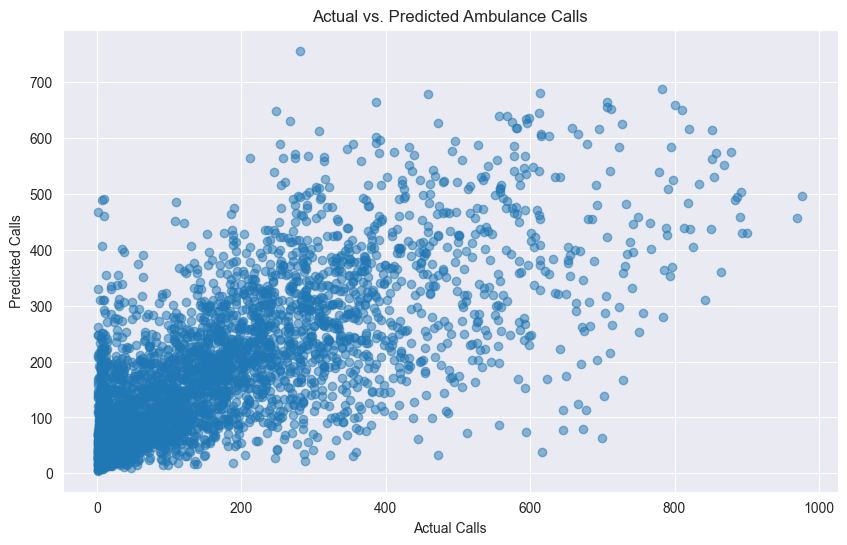

In [22]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Calls')
plt.ylabel('Predicted Calls')
plt.title('Actual vs. Predicted Ambulance Calls')
plt.show()


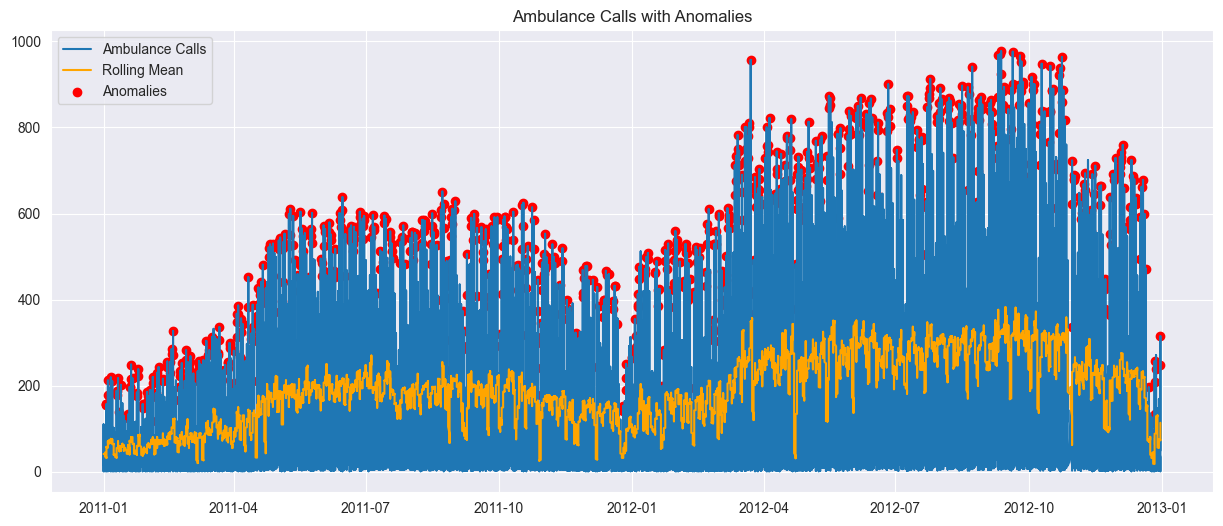

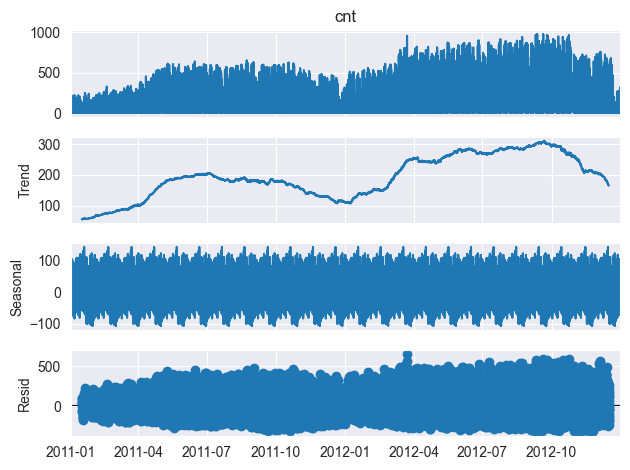

In [23]:
data['rolling_mean'], data['rolling_std'] = data['cnt'].rolling(window=24).mean(), data['cnt'].rolling(window=24).std()

data['anomaly'] = (data['cnt'] > data['rolling_mean'] + 2 * data['rolling_std']) | \
                  (data['cnt'] < data['rolling_mean'] - 2 * data['rolling_std'])

plt.figure(figsize=(15, 6))
plt.plot(data['cnt'], label='Ambulance Calls')
plt.plot(data['rolling_mean'], color='orange', label='Rolling Mean')
plt.scatter(data.index[data['anomaly']], data['cnt'][data['anomaly']], color='red', label='Anomalies')
plt.legend()
plt.title('Ambulance Calls with Anomalies')
plt.show()

result = seasonal_decompose(data['cnt'], model='additive', period=24*30)
result.plot()
plt.show()


In [ ]:
The data preparation involved extracting day, month, year, and hour features from the timestamp, 
with categorical variables like season, weather situation, and weekday one-hot encoded. This setup ensured the data was
structured for modeling, addressing both the "way I’m thinking" and "how I code" by creating features that would help capture daily, weekly, and seasonal patterns in ambulance calls.

After this, I split the dataset into training and testing sets and scaled it to ensure uniformity across features, which helps the model’s performance. 
I trained a RandomForestRegressor model, using Mean Squared Error (MSE) to evaluate its accuracy, focusing on clear predictive insights.

In terms of "storytelling," anomalies were highlighted by comparing the data to a rolling mean and standard deviation, flagging extreme deviations beyond two standard deviations from the mean. 
This approach not only indicates when unusual call volumes occur but also helps visualize potential causes or patterns.

Finally, for "suggestions," future improvements could involve using time series forecasting models or enhanced anomaly detection techniques, like isolation forests, to 
capture trends and anomalies more effectively and further enhance accuracy.